# 전북대학교 통계학과 빅데이터 분석 경진대회

## 신통방통 Team

`-` 팀장 : 문우혁(201822009)

`-` 팀원 : 고경수(201821991), 조성현(201922042)

연구주제

1. 혼잡도를 예측하는 모델 구현
2. 혼잡도와 미세먼지 사이의 관계 분석

# `-` 분석

# Import

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))

import warnings
warnings.filterwarnings('ignore')

<Figure size 1080x720 with 0 Axes>

# Data Load

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/external-data/new_data4.csv
/kaggle/input/external-data/location.csv
/kaggle/input/external-data/in_june.csv
/kaggle/input/external-data/datalc.csv
/kaggle/input/external-data/final.csv
/kaggle/input/external-data/in_april.csv
/kaggle/input/external-data/data2_final.csv
/kaggle/input/external-data/new_data2.csv
/kaggle/input/external-data/out_april.csv
/kaggle/input/external-data/new_out_april.csv
/kaggle/input/statjbnu1/data2.csv
/kaggle/input/statjbnu1/data3.csv
/kaggle/input/statjbnu1/data1.csv


In [3]:
data1 = pd.read_csv('/kaggle/input/statjbnu1/data1.csv') # 지하철 혼잡도 정보
data2 = pd.read_csv('/kaggle/input/external-data/new_data2.csv') # 2019년도 역사 대기 정보
data3 = pd.read_csv('/kaggle/input/statjbnu1/data3.csv') # 자치구별 지하철역 정보

# EDA

## - Data1

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 44 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   조사일자      1668 non-null   object 
 1   호선        1668 non-null   object 
 2   역번호       1668 non-null   int64  
 3   역명        1668 non-null   object 
 4   구분        1668 non-null   object 
 5   5:30      1636 non-null   float64
 6   6:00      1658 non-null   float64
 7   6:30      1658 non-null   float64
 8   7:00      1658 non-null   float64
 9   7:30      1658 non-null   float64
 10  8:00      1658 non-null   float64
 11  8:30      1658 non-null   float64
 12  9:00      1658 non-null   float64
 13  9:30      1658 non-null   float64
 14  10:00     1658 non-null   float64
 15  10:30     1658 non-null   float64
 16  11:00     1658 non-null   float64
 17  11:30     1658 non-null   float64
 18  12:00     1658 non-null   float64
 19  12:30     1658 non-null   float64
 20  13:00     1658 non-null   floa

- 수치형 변수가 39개, 범주형 변수가 4개입니다.

In [5]:
data1.head(3)

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
0,평일,1호선,150,서울역,상선,8.2,12.9,21.5,28.4,46.7,...,15.1,15.9,17.1,16.0,19.0,15.2,10.5,7.8,6.0,0.9
1,평일,1호선,150,서울역,하선,11.8,13.5,12.2,17.8,26.4,...,36.5,31.2,37.6,44.6,45.6,37.8,28.8,19.3,7.1,0.4
2,평일,1호선,151,시청,상선,7.7,11.2,19.6,24.4,36.2,...,18.7,18.3,20.7,22.0,24.0,18.7,13.7,10.0,6.9,1.0


In [6]:
data1.isna().sum()

조사일자           0
호선             0
역번호            0
역명             0
구분             0
5:30          32
6:00          10
6:30          10
7:00          10
7:30          10
8:00          10
8:30          10
9:00          10
9:30          10
10:00         10
10:30         10
11:00         10
11:30         10
12:00         10
12:30         10
13:00         10
13:30         10
14:00         10
14:30         10
15:00         10
15:30         10
16:00         10
16:30         10
17:00         10
17:30         10
18:00         10
18:30         10
19:00         10
19:30         10
20:00         10
20:30         10
21:00         10
21:30         10
22:00         10
22:30         10
23:00         10
23:30         22
24:00:00    1112
24:30:00    1112
dtype: int64

- 시간대별로 결측치가 존재함을 볼 수 있습니다.

### 수치형자료 요약통계

In [7]:
data1.drop('역번호', axis=1).describe()

,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
count,1636.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,...,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1646.000000,556.000000,556.000000
mean,16.749511,15.358685,14.474186,17.078709,22.845537,31.793185,28.883293,28.920808,28.096743,26.270084,...,24.018577,24.099879,25.404946,25.212786,27.466888,25.327624,22.404403,16.876974,10.686691,7.098381
std,13.608137,10.010372,10.418186,15.173881,21.170321,28.929766,24.292354,21.110043,17.058147,14.591604,...,14.212586,14.619319,16.030848,16.107091,18.342019,17.124926,15.643444,13.931419,7.696273,5.737144
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,8.500000,7.700000,7.700000,9.300000,13.300000,13.700000,15.100000,16.700000,16.200000,...,13.800000,13.100000,13.800000,13.325000,14.000000,12.700000,10.600000,7.000000,4.275000,2.800000
50%,13.200000,13.600000,11.700000,12.000000,15.300000,21.700000,21.100000,23.300000,24.850000,24.100000,...,22.200000,21.900000,23.000000,22.500000,24.000000,21.550000,19.250000,13.500000,9.850000,5.700000
75%,21.500000,19.675000,18.300000,20.800000,28.500000,39.700000,35.175000,37.300000,36.375000,34.800000,...,32.375000,32.800000,34.375000,34.900000,38.500000,35.100000,31.500000,23.275000,14.850000,10.300000
max,85.200000,62.300000,69.300000,97.600000,118.200000,161.700000,172.700000,139.900000,93.700000,81.500000,...,75.900000,79.600000,89.300000,105.300000,119.000000,95.900000,94.000000,118.800000,41.300000,31.000000


- 역 번호의 경우 숫자로 나타나있지만 범주형 변수입니다.

### 범주형자료 요약통계

In [8]:
data1['조사일자'].value_counts()

평일     556
토요일    556
일요일    556
Name: 조사일자, dtype: int64

- 평일, 토요일, 일요일이 균등하게 분포되어있습니다.

In [9]:
data1['호선'].value_counts().sort_values(ascending=False)

5호선     306
7호선     306
2호선     258
6호선     228
3호선     204
4호선     156
8호선     102
1호선      60
성수지선     24
신정지선     24
Name: 호선, dtype: int64

<AxesSubplot:xlabel='호선', ylabel='count'>

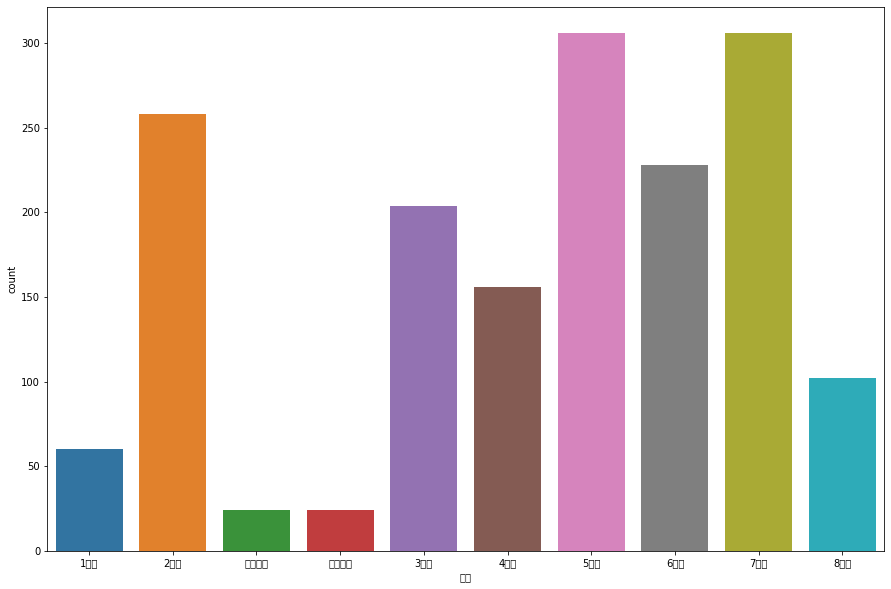

In [10]:
plt.figure(figsize=(15,10))

sns.countplot(x="호선", data=data1)

In [11]:
data1['구분'].value_counts()

상선    681
하선    681
내선    153
외선    153
Name: 구분, dtype: int64

<AxesSubplot:xlabel='구분', ylabel='count'>

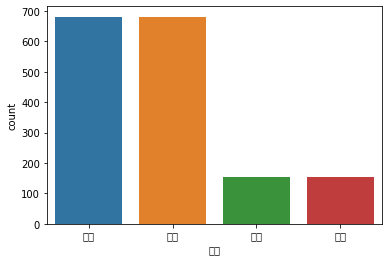

In [12]:
sns.countplot(x="구분", data=data1)

- 상선과 하선이 681, 내선과 외선이 153임을 볼 수 있습니다.

In [13]:
data1['역명'].value_counts()

종로3가         18
동대문역사문화공원    18
서울역          12
사당           12
잠실           12
             ..
성신여대입구        6
한성대입구         6
혜화            6
명동            6
모란            6
Name: 역명, Length: 241, dtype: int64

In [14]:
data1['역명'].value_counts().unique()

array([18, 12,  6])

- 같은 역명을 가진 값들이 6의 배수로 존재하였습니다. 데이터를 살펴본 결과, 첫번째로 평일, 토요일, 주말로 구분되기에 x3 두번째로 상선/하선, 외선/내선으로 구분되기에 x2 를 하여 6의 배수로 존재하였으며

In [15]:
data1[data1['역명'] == '종로3가'].head(6)

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
6,평일,1호선,153,종로3가,상선,6.3,8.1,14.4,16.3,22.9,...,27.1,25.2,32.9,33.8,40.1,28.9,20.5,14.2,10.4,1.2
7,평일,1호선,153,종로3가,하선,12.1,12.2,15.9,23.1,39.9,...,20.0,15.6,18.5,21.4,21.9,19.0,12.8,10.9,2.6,1.3
142,평일,3호선,319,종로3가,상선,16.9,15.0,14.2,25.3,35.0,...,59.1,49.7,54.7,50.3,62.7,49.8,45.9,30.2,21.2,11.7
143,평일,3호선,319,종로3가,하선,25.2,26.6,34.0,49.5,56.3,...,18.9,18.2,23.3,22.0,23.3,18.0,16.3,9.0,3.9,3.2
290,평일,5호선,2535,종로3가,상선,13.8,21.9,24.0,39.3,57.2,...,21.5,21.7,21.6,24.5,25.3,20.8,18.0,15.6,13.7,4.6
291,평일,5호선,2535,종로3가,하선,7.2,13.9,11.9,16.4,23.5,...,37.1,36.4,39.1,37.4,41.0,36.0,25.1,18.9,8.1,7.2


- '종로3가'와 같이 3개의 호선의 다니는 경우 x3, '서울역'과 같이 2개의 호선의 다니는 경우 x2가 되어 6인 값, 12인 값, 18인 값이 존재하였습니다.

### 시간대별 평균혼잡도

In [16]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 20)
data1.drop('역번호', axis=1).groupby('역명').mean().transpose()

역명,가락시장,가산디지털단지,강남,강남구청,강동,강동구청,강변,개롱,개화산,거여,...,한양대,합정,행당,혜화,홍대입구,홍제,화곡,화랑대,회현,효창공원앞
5:30,13.160000,31.483333,33.516667,17.266667,7.600000,13.616667,13.266667,7.200000,3.000000,4.550000,...,13.566667,18.183333,16.450000,31.166667,22.333333,19.450000,21.400000,3.216667,14.366667,10.750000
6:00,13.275000,20.766667,19.116667,27.083333,8.766667,15.683333,12.533333,7.533333,2.133333,4.033333,...,12.483333,15.841667,14.816667,23.933333,16.750000,17.716667,14.350000,3.533333,15.200000,12.050000
6:30,13.700000,22.316667,19.866667,21.850000,14.233333,19.016667,12.000000,7.450000,2.300000,4.416667,...,11.283333,13.541667,12.933333,23.783333,16.083333,16.650000,13.816667,4.033333,13.066667,10.783333
7:00,16.366667,25.283333,21.566667,22.683333,12.766667,21.416667,15.350000,8.666667,2.516667,5.100000,...,14.233333,16.150000,16.166667,27.566667,17.566667,22.166667,16.766667,5.550000,15.616667,13.150000
7:30,22.558333,30.450000,31.416667,27.933333,20.216667,28.683333,22.850000,12.800000,3.366667,7.133333,...,18.733333,23.516667,21.633333,36.133333,26.150000,30.183333,21.650000,8.366667,19.450000,17.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:30,21.716667,34.433333,52.150000,34.933333,19.750000,23.966667,28.933333,7.500000,2.516667,3.216667,...,30.966667,36.191667,23.283333,51.500000,45.900000,26.300000,14.133333,3.916667,30.050000,24.766667
23:00,18.141667,29.900000,48.150000,31.083333,14.766667,20.066667,27.250000,6.733333,2.066667,2.866667,...,26.350000,35.858333,20.166667,49.700000,47.700000,20.716667,12.550000,3.433333,30.916667,24.733333
23:30,13.466667,21.600000,36.933333,20.866667,9.166667,14.616667,20.933333,4.516667,1.383333,2.200000,...,20.366667,27.191667,13.766667,35.450000,39.033333,14.166667,8.850000,2.233333,22.400000,16.983333
24:00:00,7.600000,17.050000,22.650000,17.650000,6.350000,12.400000,13.100000,2.050000,1.400000,0.950000,...,11.500000,14.900000,10.450000,22.450000,15.450000,13.650000,7.550000,1.700000,13.200000,11.600000


In [17]:
dftemp = data1.drop('역번호', axis=1).groupby('역명').mean().mean().transpose()

In [18]:
dftemp

5:30        16.740523
6:00        15.258419
6:30        14.474961
7:00        17.066588
7:30        22.801982
              ...    
22:30       24.867416
23:00       21.962358
23:30       16.448730
24:00:00    10.541044
24:30:00     7.108921
Length: 39, dtype: float64

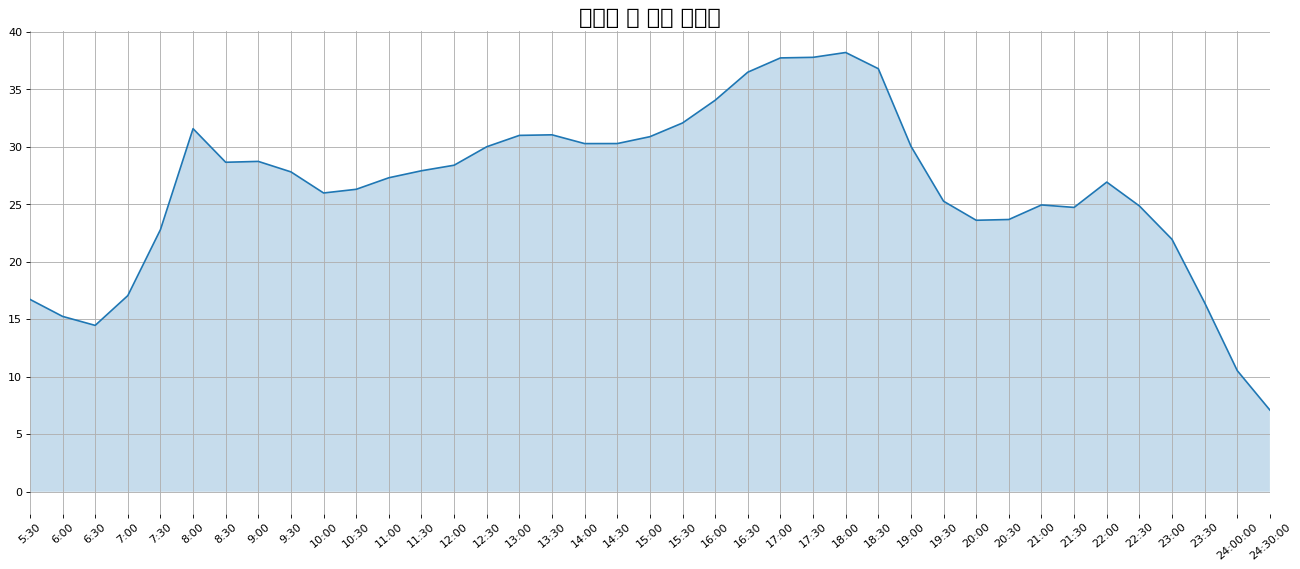

In [19]:
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(dftemp)
plt.title('시간대 별 평균 혼잡도', fontsize=20)
plt.grid(True)
plt.fill_between(dftemp.index, dftemp.values, alpha=0.25)
plt.xticks(rotation=40)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.margins(x=0)
plt.show()

[Text(0, 0, '5:30'),
 Text(1, 0, '6:00'),
 Text(2, 0, '6:30'),
 Text(3, 0, '7:00'),
 Text(4, 0, '7:30'),
 Text(5, 0, '8:00'),
 Text(6, 0, '8:30'),
 Text(7, 0, '9:00'),
 Text(8, 0, '9:30'),
 Text(9, 0, '10:00'),
 Text(10, 0, '10:30'),
 Text(11, 0, '11:00'),
 Text(12, 0, '11:30'),
 Text(13, 0, '12:00'),
 Text(14, 0, '12:30'),
 Text(15, 0, '13:00'),
 Text(16, 0, '13:30'),
 Text(17, 0, '14:00'),
 Text(18, 0, '14:30'),
 Text(19, 0, '15:00'),
 Text(20, 0, '15:30'),
 Text(21, 0, '16:00'),
 Text(22, 0, '16:30'),
 Text(23, 0, '17:00'),
 Text(24, 0, '17:30'),
 Text(25, 0, '18:00'),
 Text(26, 0, '18:30'),
 Text(27, 0, '19:00'),
 Text(28, 0, '19:30'),
 Text(29, 0, '20:00'),
 Text(30, 0, '20:30'),
 Text(31, 0, '21:00'),
 Text(32, 0, '21:30'),
 Text(33, 0, '22:00'),
 Text(34, 0, '22:30'),
 Text(35, 0, '23:00'),
 Text(36, 0, '23:30'),
 Text(37, 0, '24:00:00'),
 Text(38, 0, '24:30:00')]

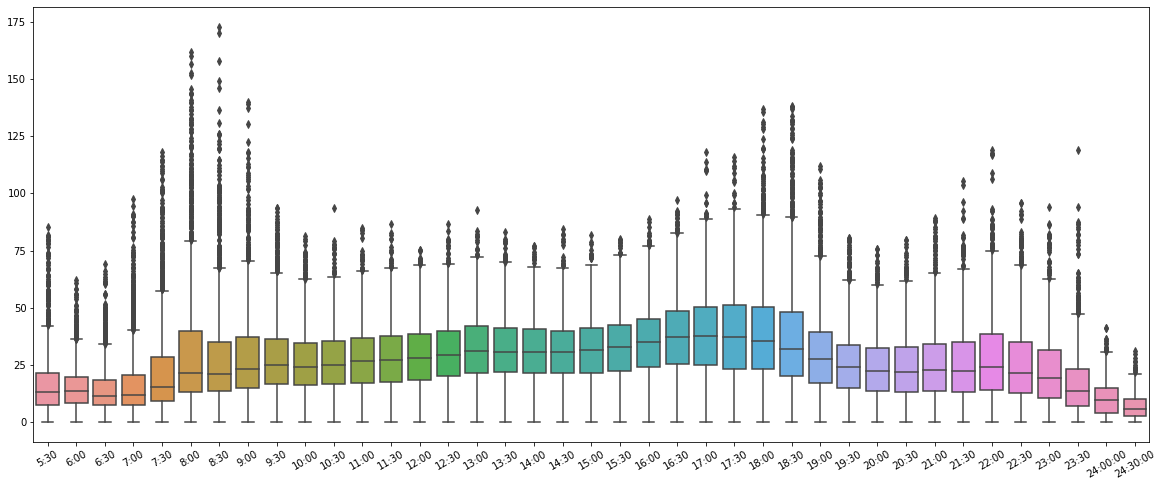

In [20]:
# 평균 혼잡도가 아닌 혼잡도의 boxplot
plt.figure(figsize=(20,8))
ax = sns.boxplot(data = data1.drop('역번호', axis=1))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)

- 출근시간대와 퇴근시간대에 혼잡도가 유난히 높음을 볼 수 있습니다.

## - Data2

In [21]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   호선명                      254 non-null    object 
 1   역명                       254 non-null    object 
 2   미세먼지_PM-10(140 ㎍/㎥ 이하)   254 non-null    float64
 3   이산화탄소_CO2 (1000 ppm 이하)  254 non-null    int64  
 4   포름알데히드_HCHO(100 ㎍/㎥ 이하)  254 non-null    float64
 5   일산화탄소_CO(9 ppm이하)        254 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 12.0+ KB


In [22]:
data2.columns = ['호선명', '역명', '미세먼지', '이산화탄소', '포름알데히드', '일산화탄소']

In [23]:
data2.head(3)

,호선명,역명,미세먼지,이산화탄소,포름알데히드,일산화탄소
0,1호선,서울(1),70.5,606,4.0,0.8
1,1호선,시청(1),54.7,581,4.4,0.7
2,1호선,종각(1),82.9,471,11.5,0.7


- 수치형 변수가 39개, 범주형 변수가 4개입니다.

In [24]:
data2.isna().sum()

호선명       0
역명        0
미세먼지      0
이산화탄소     0
포름알데히드    0
일산화탄소     0
dtype: int64

- 결측치는 존재하지 않습니다.

### 수치형자료 요약통계

In [25]:
data2.describe()

,미세먼지,이산화탄소,포름알데히드,일산화탄소
count,254.000000,254.000000,254.000000,254.000000
mean,66.042520,549.688976,7.103543,0.727559
std,25.288442,85.605087,4.082289,0.262453
min,20.000000,419.000000,1.400000,0.300000
25%,48.850000,494.250000,4.625000,0.500000
50%,63.850000,532.500000,6.100000,0.700000
75%,78.850000,588.500000,8.675000,0.800000
max,155.300000,932.000000,33.600000,2.200000


### 범주형자료 요약통계

In [26]:
data2.describe(include='object')

,호선명,역명
count,254,254
unique,8,254
top,5호선,서울(1)
freq,51,1


In [27]:
data2['호선명'].value_counts().sort_values(ascending=False)

5호선    51
7호선    48
6호선    38
2호선    37
3호선    32
4호선    21
8호선    17
1호선    10
Name: 호선명, dtype: int64

<AxesSubplot:xlabel='호선명', ylabel='count'>

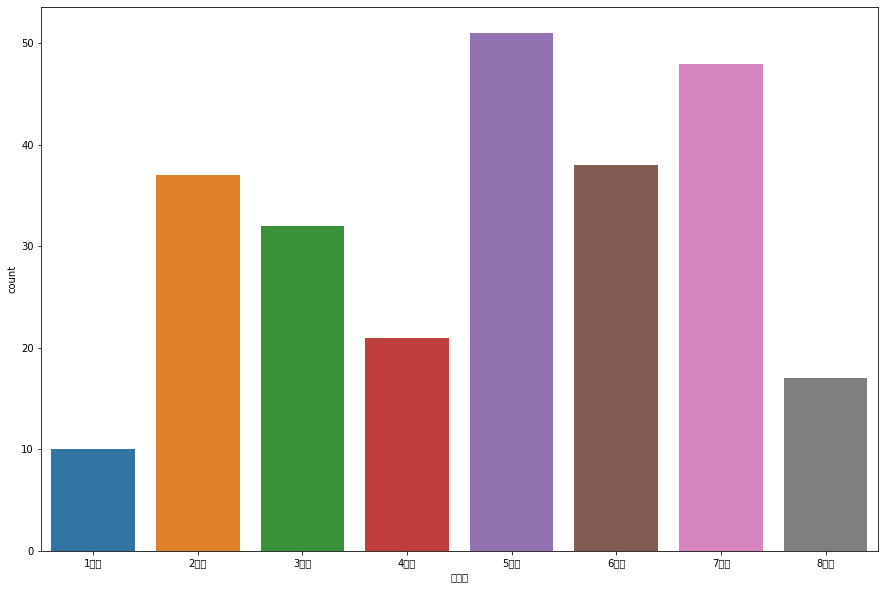

In [28]:
plt.figure(figsize=(15,10))
sns.countplot(x="호선명", data=data2)

- 데이터는 5호선, 7호선, ... , 1호선 순으로 많았습니다.

In [29]:
data2.groupby('호선명').mean()

,미세먼지,이산화탄소,포름알데히드,일산화탄소
호선명,,,,
1호선,67.330000,566.600000,5.660000,0.820000
2호선,63.737838,607.621622,5.594595,0.683784
3호선,57.275000,578.781250,6.128125,0.634375
4호선,67.995238,542.666667,6.752381,0.623810
5호선,67.360784,513.901961,7.609804,0.972549
6호선,66.618421,510.763158,8.155263,0.689474
7호선,72.568750,560.333333,7.812500,0.689583
8호선,60.723529,531.882353,7.635294,0.529412


- 호선별로 평균을 내서 상관계수를 살펴본 결과,

In [30]:
data2.groupby('호선명').mean().corr()

,미세먼지,이산화탄소,포름알데히드,일산화탄소
미세먼지,1.000000,-0.250744,0.343951,0.408386
이산화탄소,-0.250744,1.000000,-0.823988,-0.215412
포름알데히드,0.343951,-0.823988,1.000000,-0.021925
일산화탄소,0.408386,-0.215412,-0.021925,1.000000


<AxesSubplot:>

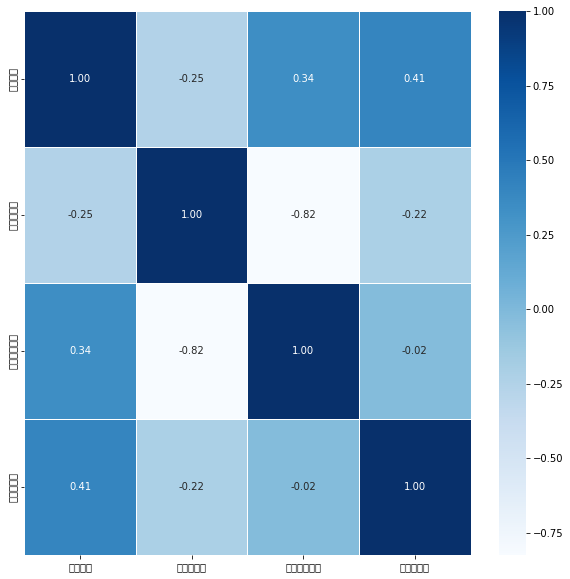

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(data = data2.groupby('호선명').mean().corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

- 포름알데히드와 이산화탄소의 상관계수가 -0.82로 높은수치의 음의상관을, 미세먼지와 일산화탄소가 0.41로 양의상관을 가졌습니다.

# `-` 혼잡도 예측 모델

# Data Preprocessing

In [32]:
def trim1(A):
    if A[-2:] == '호선':
        A = A[0:-2]
    return A

In [33]:
data1['호선'] = data1['호선'].apply(trim1)

- 호선은 범주형 데이터이기 때문에 수치로 들어가면 모델이 호선의 번호가 작으면 값이 커지고, 호선의 번호가 크면 값이 작아진다는 식으로 학습할 수 있기에 one hot encoding을 사용하여 범주화

In [34]:
dummy = pd.get_dummies(data1['호선'], prefix='호선')

In [35]:
dummy['역번호'] = data1['역번호'] # 더미에 '역번호' 변수추가. merge를 위함

In [36]:
dummy = dummy.drop_duplicates() # 중복 행 제거

In [37]:
dummy

,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,역번호
0,1,0,0,0,0,0,0,0,0,0,150
2,1,0,0,0,0,0,0,0,0,0,151
4,1,0,0,0,0,0,0,0,0,0,152
6,1,0,0,0,0,0,0,0,0,0,153
8,1,0,0,0,0,0,0,0,0,0,154
...,...,...,...,...,...,...,...,...,...,...,...
546,0,0,0,0,0,0,0,1,0,0,2823
548,0,0,0,0,0,0,0,1,0,0,2824
550,0,0,0,0,0,0,0,1,0,0,2825
552,0,0,0,0,0,0,0,1,0,0,2826


In [38]:
data1.head(1)

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
0,평일,1,150,서울역,상선,8.2,12.9,21.5,28.4,46.7,...,15.1,15.9,17.1,16.0,19.0,15.2,10.5,7.8,6.0,0.9


- data1에서, 5:30 ~ 24:30의 혼잡도를 평균낸 변수를 사용하도록 하겠습니다.

In [39]:
avg = pd.Series(data1.groupby('역번호').mean().transpose().mean()) # 역 번호 별 하루동안의 평균 혼잡도
avg = pd.DataFrame(avg).reset_index()
avg.columns = '역번호', '혼잡도'

In [40]:
pd.merge(dummy, avg, how = 'right')

,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,역번호,혼잡도
0,1,0,0,0,0,0,0,0,0,0,150,28.724786
1,1,0,0,0,0,0,0,0,0,0,151,27.414530
2,1,0,0,0,0,0,0,0,0,0,152,26.819231
3,1,0,0,0,0,0,0,0,0,0,153,27.073504
4,1,0,0,0,0,0,0,0,0,0,154,27.154274
...,...,...,...,...,...,...,...,...,...,...,...,...
273,0,0,0,0,0,0,0,1,0,0,2823,13.455983
274,0,0,0,0,0,0,0,1,0,0,2824,10.121795
275,0,0,0,0,0,0,0,1,0,0,2825,7.811111
276,0,0,0,0,0,0,0,1,0,0,2826,7.027350


- 역 번호별로 몇호선인지 범주화하였고, 평균혼잡도 변수를 추가하여 넣어주었습니다.

In [41]:
pd.DataFrame(pd.merge(dummy, avg, how = 'right').drop('역번호', axis=1).corr()['혼잡도'])

,혼잡도
호선_1,-0.025177
호선_2,0.407414
호선_3,0.019287
호선_4,0.108175
호선_5,-0.240438
...,...
호선_7,0.118444
호선_8,-0.063381
호선_성수지선,-0.187404
호선_신정지선,-0.042701


- 혼잡도와 2호선 변수와의 상관계수가 0.4, 5호선과 -0.24, 6호선과 -0.26의 상관계수를 가짐을 볼 수 있습니다.

In [42]:
new_data1 = pd.merge(data1, dummy)

- 위에서 만든 dummy 데이터프레임을 data1과 병합해줍니다.

In [43]:
data1.drop('역번호', axis=1).groupby('조사일자').mean()

,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
조사일자,,,,,,,,,,,,,,,,,,,,,
일요일,10.750370,9.996552,8.851906,8.638294,10.728675,14.915789,16.080399,20.684392,22.560073,22.968058,...,19.311797,19.697459,20.181670,18.758621,19.933031,17.609437,15.056624,10.370826,NaN,NaN
토요일,18.775370,16.535935,13.278221,13.119419,16.405808,23.738113,24.585662,28.231397,29.113975,28.667695,...,24.566062,24.883485,26.379673,26.645372,29.172595,28.809619,27.890381,22.288624,NaN,NaN
평일,20.608453,19.505935,21.231115,29.366906,41.235252,56.501439,45.830036,37.766367,32.575540,27.166367,...,28.140468,27.686151,29.615288,30.189209,33.242626,29.525719,24.249460,17.949820,10.686691,7.098381


- 조사일자의 경우 범주형이지만, 혼잡도가 평일 > 토요일 > 일요일의 경향성이 있기에 평일은 2, 토요일은 1, 일요일은 0의 숫자를 부여하였습니다.

In [44]:
new_data1.loc[new_data1['조사일자'] == '평일', '조사일자'] = 2
new_data1.loc[new_data1['조사일자'] == '토요일', '조사일자'] = 1
new_data1.loc[new_data1['조사일자'] == '일요일', '조사일자'] = 0

new_data1['조사일자'] = new_data1['조사일자'].astype(int) # 오브젝트를 int형으로

In [45]:
avg = new_data1[['5:30', '6:00', '6:30', '7:00', '7:30','8:00', '8:30', '9:00', '9:30', '10:00', '10:30', '11:00', '11:30',
       '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30',
       '16:00', '16:30', '17:00', '17:30', '18:00', '18:30', '19:00', '19:30',
       '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00', '23:30',
       '24:00:00', '24:30:00']].transpose().mean()

In [46]:
avg

0       29.746154
1       34.389744
2       33.872973
3       36.681081
4       20.489189
          ...    
1663     0.000000
1664     6.286486
1665     0.000000
1666     5.859459
1667     0.000000
Length: 1668, dtype: float64

In [47]:
new_data1['평균혼잡도'] = avg

- data1에 '평균혼잡도' 변수를 추가합니다. 여기서 평균혼잡도가 0인 데이터와 결측치는 삭제해주도록 하겠습니다.

In [48]:
new_data1 = new_data1.drop(new_data1[new_data1['평균혼잡도'] == 0].index, axis = 0)
new_data1 = new_data1.drop(new_data1[new_data1['평균혼잡도'].isna()].index, axis = 0)

In [49]:
new_data1.head(3)

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,평균혼잡도
0,2,1,150,서울역,상선,8.2,12.9,21.5,28.4,46.7,...,0,0,0,0,0,0,0,0,0,29.746154
1,2,1,150,서울역,하선,11.8,13.5,12.2,17.8,26.4,...,0,0,0,0,0,0,0,0,0,34.389744
2,1,1,150,서울역,상선,8.1,13.2,15.6,14.4,15.9,...,0,0,0,0,0,0,0,0,0,33.872973


In [50]:
new_data1.corr()['조사일자']['평균혼잡도']

0.356515395826273

- 조사일자와 평균혼잡도 사이에 0.3의 상관계수가 있습니다.

- 논문에 따르면 역 근처에 버스터미널이 있을 때 승하차 인원이 많다는것 가정이 유의하다고 합니다. 이에따라 버스터미널 변수도 추가해주었습니다.

In [51]:
new_data1['버스터미널'] = 0

new_data1.loc[new_data1['역명'] == '고속터미널', '버스터미널'] = 1
new_data1.loc[new_data1['역명'] == '남부터미널', '버스터미널'] = 1
new_data1.loc[new_data1['역명'] == '강변', '버스터미널'] = 1
new_data1.loc[new_data1['역명'] == '망우', '버스터미널'] = 1

- '구분'변수

In [52]:
new_data1[new_data1['구분'] == '상선'].head(3)

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,평균혼잡도,버스터미널
0,2,1,150,서울역,상선,8.2,12.9,21.5,28.4,46.7,...,0,0,0,0,0,0,0,0,29.746154,0
2,1,1,150,서울역,상선,8.1,13.2,15.6,14.4,15.9,...,0,0,0,0,0,0,0,0,33.872973,0
4,0,1,150,서울역,상선,3.4,7.4,8.5,7.9,10.3,...,0,0,0,0,0,0,0,0,20.489189,0


In [53]:
new_data1[new_data1['구분'] == '하선'].head(3)

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,평균혼잡도,버스터미널
1,2,1,150,서울역,하선,11.8,13.5,12.2,17.8,26.4,...,0,0,0,0,0,0,0,0,34.389744,0
3,1,1,150,서울역,하선,18.3,13.7,9.7,13.8,9.7,...,0,0,0,0,0,0,0,0,36.681081,0
5,0,1,150,서울역,하선,7.9,7.2,5.5,7.1,5.4,...,0,0,0,0,0,0,0,0,22.240541,0


- 하선 > 상선

In [54]:
new_data1[new_data1['구분'] == '내선'].head(3)

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,평균혼잡도,버스터미널
60,2,2,201,시청,내선,19.7,19.7,25.5,36.0,52.6,...,0,0,0,0,0,0,0,0,38.961538,0
62,1,2,201,시청,내선,23.7,15.5,14.1,13.4,16.0,...,0,0,0,0,0,0,0,0,37.235135,0
64,0,2,201,시청,내선,18.1,11.7,10.3,11.2,16.6,...,0,0,0,0,0,0,0,0,30.567568,0


In [55]:
new_data1[new_data1['구분'] == '외선'].head(3)

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,평균혼잡도,버스터미널
61,2,2,201,시청,외선,12.5,20.4,11.8,18.1,33.2,...,0,0,0,0,0,0,0,0,40.056410,0
63,1,2,201,시청,외선,15.1,17.3,8.4,7.6,10.9,...,0,0,0,0,0,0,0,0,41.329730,0
65,0,2,201,시청,외선,4.9,9.2,5.4,5.4,8.5,...,0,0,0,0,0,0,0,0,30.783784,0


- 외선 > 내선

- 하선 > 상선, 외선 > 내선이므로 하선과 외선에는 1, 상선과 내선에는 0을 부여하도록 하겠습니다.

In [56]:
new_data1.loc[new_data1['구분']=='하선', '구분'] = 1
new_data1.loc[new_data1['구분']=='외선', '구분'] = 1

new_data1.loc[new_data1['구분']=='상선', '구분'] = 0
new_data1.loc[new_data1['구분']=='내선', '구분'] = 0

new_data1['구분'] = new_data1['조사일자'].astype(int) # 오브젝트를 int형으로

# Modeling

- 독립변수를 ['조사일자', '구분', '호선', '버스터미널'], 종속변수를 ['평균혼잡도']로 하여 모델을 만들어 보겠습니다.

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train, x_test, y_train, y_test = train_test_split(new_data1[[
    '조사일자', '구분', '호선_1', '호선_2', '호선_3', '호선_4', '호선_5',
    '호선_6', '호선_7', '호선_8', '호선_성수지선', '호선_신정지선','버스터미널']], 
    new_data1['평균혼잡도'], test_size = 0.2, shuffle = True, random_state = 30)

In [59]:
x_train.head(3)

,조사일자,구분,호선_1,호선_2,호선_3,호선_4,호선_5,호선_6,호선_7,호선_8,호선_성수지선,호선_신정지선,버스터미널
909,1,1,0,0,0,0,1,0,0,0,0,0,0
327,1,1,0,0,0,0,0,0,0,0,1,0,0
1207,2,2,0,0,0,0,0,1,0,0,0,0,0


In [60]:
y_train.head(3)

909     33.554054
327     12.000000
1207    26.805128
Name: 평균혼잡도, dtype: float64

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [62]:
linear = LinearRegression()
linear.fit(x_train, y_train)
predl = linear.predict(x_test)
mean_squared_error(y_test, predl)

72.06796836317204

- 선형회귀로 예측한 결과입니다.

In [63]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=123,max_depth=6) # 랜덤포레스트 모델
rf.fit(x_train, y_train) # 모형 적합
predrf = rf.predict(x_test) # 예측

In [64]:
mean_squared_error(y_test, predrf)

68.51810487717748

- 랜덤포레스트로 예측한 결과입니다.

- 선형회귀보다는 랜덤포레스트의 결과가 더 좋음을 볼 수 있습니다.

In [65]:
import seaborn as sns

predicted = rf.predict(x_test)
expected = np.array(y_test)


df = pd.DataFrame([expected, predicted])

In [66]:
df = df.transpose()
df.columns = ['expected', 'predicted']
df.head(3)

,expected,predicted
0,36.984615,33.931212
1,23.313514,16.632446
2,23.654054,22.769712


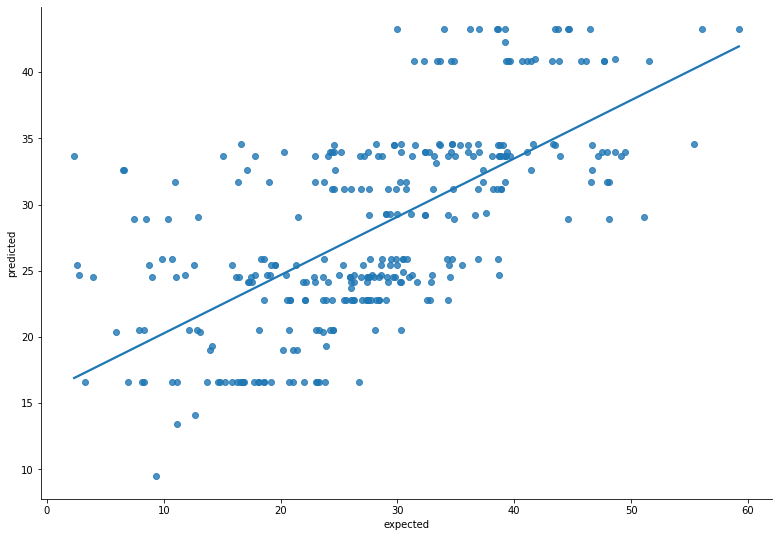

In [67]:
snsplot = sns.lmplot(x='expected',y='predicted',data=df,ci=None)
snsplot.fig.set_size_inches(12,8)
plt.xlabel('expected')
plt.ylabel('predicted')
plt.show()

- 기댓값과 예측값은 다음과 같은 분포를 보입니다.

# `-` 혼잡도와 미세먼지 사이의 관계


# Data Load

In [68]:
data = pd.read_csv('../input/external-data/final.csv')

In [69]:
data['측정일시'] = data['측정일시'].astype(str)

def trim3(A):
    A = A[-2:]
    return A

data['측정일시'] = data['측정일시'].apply(trim3)

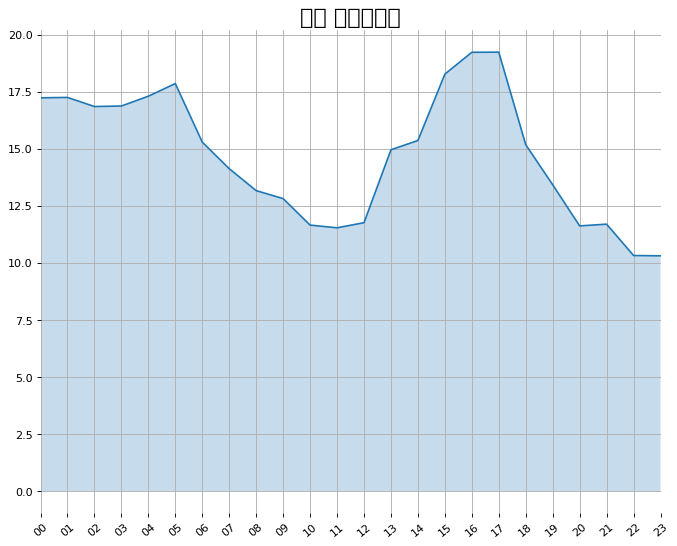

In [70]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(data.groupby('측정일시').mean()['초미세먼지(외부)'])
plt.title('외부 초미세먼지', fontsize=20)
plt.grid(True)
plt.fill_between(data.groupby('측정일시').mean()['초미세먼지(외부)'].index, data.groupby('측정일시').mean()['초미세먼지(외부)'].values, alpha=0.25)
plt.xticks(rotation=40)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.margins(x=0)
plt.show()

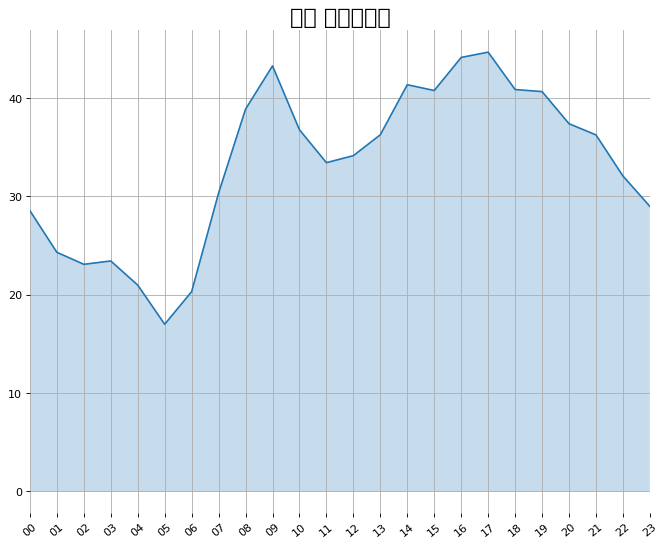

In [71]:
plt.figure(figsize=(10, 8), dpi=80)
plt.plot(data.groupby('측정일시').mean()['초미세먼지(내부)'])
plt.title('내부 초미세먼지', fontsize=20)
plt.grid(True)
plt.fill_between(data.groupby('측정일시').mean()['초미세먼지(내부)'].index, data.groupby('측정일시').mean()['초미세먼지(내부)'].values, alpha=0.25)
plt.xticks(rotation=40)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.margins(x=0)
plt.show()

In [72]:
data1 = pd.read_csv('../input/statjbnu1/data1.csv')
data2 = pd.read_csv('../input/statjbnu1/data2.csv')

- 결측 데이터를 관측해보자.

In [73]:
data1[data1['24:00:00'].isna()==True].head(3)

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
556,토요일,1호선,150,서울역,상선,8.1,13.2,15.6,14.4,15.9,...,15.3,16.5,15.9,16.8,18.9,14.4,12.5,18.4,NaN,NaN
557,토요일,1호선,150,서울역,하선,18.3,13.7,9.7,13.8,9.7,...,28.0,29.2,34.8,38.0,41.1,29.5,27.4,11.4,NaN,NaN
558,토요일,1호선,151,시청,상선,5.9,12.8,14.2,12.0,14.8,...,18.9,19.8,18.2,20.1,22.2,18.0,15.2,18.3,NaN,NaN


In [74]:
data1[data1['24:00:00'].isna()==True].groupby('조사일자').size()

조사일자
일요일    556
토요일    556
dtype: int64

In [75]:
data1[data1['24:30:00'].isna()==True].head(3)

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
556,토요일,1호선,150,서울역,상선,8.1,13.2,15.6,14.4,15.9,...,15.3,16.5,15.9,16.8,18.9,14.4,12.5,18.4,NaN,NaN
557,토요일,1호선,150,서울역,하선,18.3,13.7,9.7,13.8,9.7,...,28.0,29.2,34.8,38.0,41.1,29.5,27.4,11.4,NaN,NaN
558,토요일,1호선,151,시청,상선,5.9,12.8,14.2,12.0,14.8,...,18.9,19.8,18.2,20.1,22.2,18.0,15.2,18.3,NaN,NaN


In [76]:
data1[data1['24:30:00'].isna()==True].groupby('조사일자').size()

조사일자
일요일    556
토요일    556
dtype: int64

- 먼저 1112개로 가장 결측률이 높은 두 데이터를 살펴보니, 주말 데이터에는 24:00:00, 24:30:00 데이터가 모두 결측치임을 확인할 수 있었다.

In [77]:
pd.set_option('display.max_columns', 28)
pd.set_option('display.max_rows', 32)

In [78]:
data1[data1['5:30'].isna()==True]

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,...,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
741,토요일,3호선,340,가락시장,하선,NaN,5.5,3.0,2.5,2.4,5.1,6.8,5.6,4.8,...,9.0,11.1,7.2,6.3,6.0,8.7,7.3,9.1,7.6,10.8,12.0,7.3,NaN,NaN
743,토요일,3호선,341,경찰병원,하선,NaN,4.8,2.2,2.0,1.7,3.5,5.1,4.8,4.0,...,7.8,7.2,5.7,4.9,4.6,6.3,5.5,6.3,5.6,7.4,7.7,4.8,NaN,NaN
745,토요일,3호선,342,오금,하선,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
746,토요일,4호선,409,당고개,상선,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
748,토요일,4호선,410,상계,상선,NaN,5.1,2.5,1.3,1.9,1.9,3.3,2.5,3.7,...,5.1,4.7,4.6,4.3,3.8,4.8,4.5,4.3,4.9,4.5,4.1,5.1,NaN,NaN
750,토요일,4호선,411,노원,상선,NaN,9.3,4.7,2.4,3.6,4.1,6.9,4.7,8.8,...,11.4,11.4,10.8,10.1,9.1,11.4,10.1,10.1,11.1,10.7,10.0,11.3,NaN,NaN
752,토요일,4호선,412,창동,상선,NaN,17.0,7.9,4.4,7.5,9.0,14.9,12.4,16.2,...,23.0,24.2,22.0,20.0,17.3,21.9,19.0,19.2,19.6,19.5,19.4,19.0,NaN,NaN
754,토요일,4호선,413,쌍문,상선,NaN,25.2,12.2,8.6,10.3,16.5,18.0,20.4,21.6,...,35.2,36.9,29.3,32.5,34.7,34.2,33.1,34.7,32.9,32.7,31.7,27.6,NaN,NaN
791,토요일,4호선,431,동작,하선,NaN,23.1,12.0,10.0,15.2,18.7,25.3,26.7,34.6,...,57.3,53.4,36.7,35.7,32.9,29.9,34.7,43.1,41.8,40.0,44.3,36.3,NaN,NaN
793,토요일,4호선,432,총신대입구,하선,NaN,26.3,13.8,11.9,16.3,21.3,28.5,31.2,40.2,...,61.1,56.0,38.9,36.8,34.7,32.0,37.5,45.9,43.6,42.4,46.6,36.0,NaN,NaN


- 5:30 열의 결측 데이터 32개를 한 눈에 볼 수 있도록 펼쳐보았다. 10개의 결측치를 가지는 나머지 열들이 모두 포함됨을 알 수 있었다. 이 10개 데이터를 삭제하겠다.

In [79]:
data1.drop(data1[data1['6:00'].isna()==True].index, inplace=True)

In [80]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)

In [81]:
data1.isna().sum()

조사일자           0
호선             0
역번호            0
역명             0
구분             0
            ... 
22:30          0
23:00          0
23:30         12
24:00:00    1102
24:30:00    1102
Length: 44, dtype: int64

In [82]:
data1.reset_index(drop=True ,inplace=True)

In [83]:
data1.head(3)

,조사일자,호선,역번호,역명,구분,5:30,6:00,6:30,7:00,7:30,...,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,24:00:00,24:30:00
0,평일,1호선,150,서울역,상선,8.2,12.9,21.5,28.4,46.7,...,15.1,15.9,17.1,16.0,19.0,15.2,10.5,7.8,6.0,0.9
1,평일,1호선,150,서울역,하선,11.8,13.5,12.2,17.8,26.4,...,36.5,31.2,37.6,44.6,45.6,37.8,28.8,19.3,7.1,0.4
2,평일,1호선,151,시청,상선,7.7,11.2,19.6,24.4,36.2,...,18.7,18.3,20.7,22.0,24.0,18.7,13.7,10.0,6.9,1.0


- 성공적으로 삭제되었다. 다음으로 시간대 별 평균 혼잡도를 살펴보겠다.

In [84]:
data1.drop('역번호', axis=1).groupby('역명').mean().transpose()

역명,가락시장,가산디지털단지,강남,강남구청,강동,강동구청,강변,개롱,개화산,거여,...,한양대,합정,행당,혜화,홍대입구,홍제,화곡,화랑대,회현,효창공원앞
5:30,13.160000,31.483333,33.516667,17.266667,7.600000,13.616667,13.266667,7.200000,3.000000,4.550000,...,13.566667,18.183333,16.450000,31.166667,22.333333,19.450000,21.400000,3.216667,14.366667,10.750000
6:00,13.275000,20.766667,19.116667,27.083333,8.766667,15.683333,12.533333,7.533333,2.133333,4.033333,...,12.483333,15.841667,14.816667,23.933333,16.750000,17.716667,14.350000,3.533333,15.200000,12.050000
6:30,13.700000,22.316667,19.866667,21.850000,14.233333,19.016667,12.000000,7.450000,2.300000,4.416667,...,11.283333,13.541667,12.933333,23.783333,16.083333,16.650000,13.816667,4.033333,13.066667,10.783333
7:00,16.366667,25.283333,21.566667,22.683333,12.766667,21.416667,15.350000,8.666667,2.516667,5.100000,...,14.233333,16.150000,16.166667,27.566667,17.566667,22.166667,16.766667,5.550000,15.616667,13.150000
7:30,22.558333,30.450000,31.416667,27.933333,20.216667,28.683333,22.850000,12.800000,3.366667,7.133333,...,18.733333,23.516667,21.633333,36.133333,26.150000,30.183333,21.650000,8.366667,19.450000,17.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22:30,21.716667,34.433333,52.150000,34.933333,19.750000,23.966667,28.933333,7.500000,2.516667,3.216667,...,30.966667,36.191667,23.283333,51.500000,45.900000,26.300000,14.133333,3.916667,30.050000,24.766667
23:00,18.141667,29.900000,48.150000,31.083333,14.766667,20.066667,27.250000,6.733333,2.066667,2.866667,...,26.350000,35.858333,20.166667,49.700000,47.700000,20.716667,12.550000,3.433333,30.916667,24.733333
23:30,13.466667,21.600000,36.933333,20.866667,9.166667,14.616667,20.933333,4.516667,1.383333,2.200000,...,20.366667,27.191667,13.766667,35.450000,39.033333,14.166667,8.850000,2.233333,22.400000,16.983333
24:00:00,7.600000,17.050000,22.650000,17.650000,6.350000,12.400000,13.100000,2.050000,1.400000,0.950000,...,11.500000,14.900000,10.450000,22.450000,15.450000,13.650000,7.550000,1.700000,13.200000,11.600000


- 평균치를 구해 시각화를 해보자.

In [85]:
dftempup = data1[data1['구분']=='상선'].drop('역번호', axis=1).groupby('역명').mean().mean().transpose()
dftempdown = data1[data1['구분']=='하선'].drop('역번호', axis=1).groupby('역명').mean().mean().transpose()
dftempin = data1[data1['구분']=='내선'].drop('역번호', axis=1).groupby('역명').mean().mean().transpose()
dftempout =data1[data1['구분']=='외선'].drop('역번호', axis=1).groupby('역명').mean().mean().transpose()

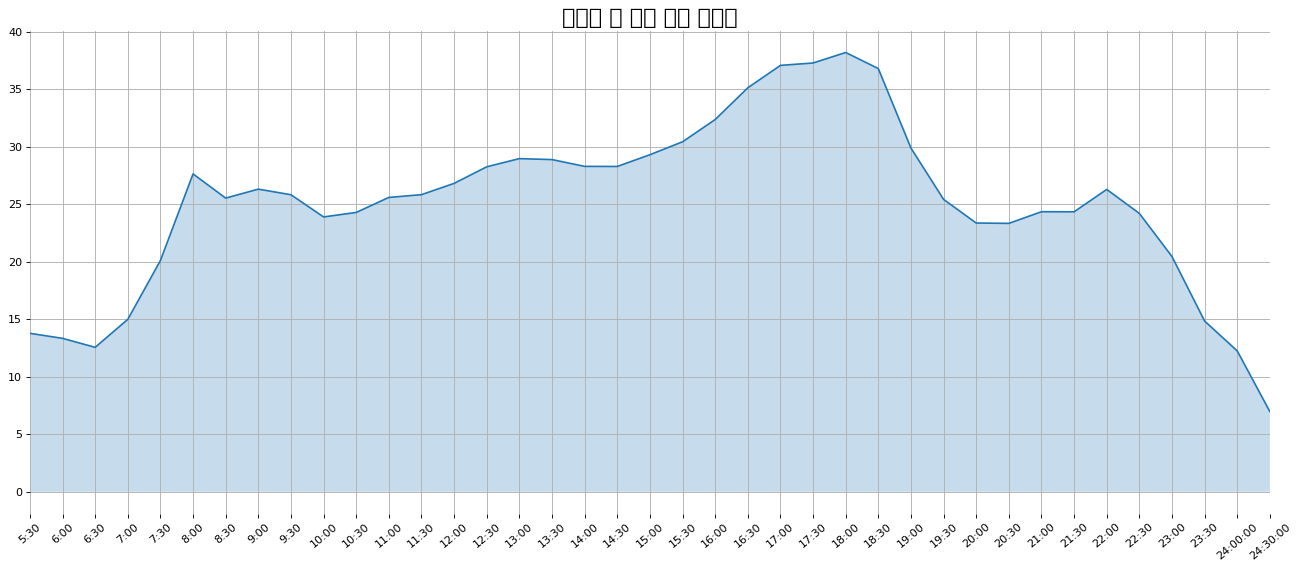

In [86]:
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(dftempup)
plt.title('시간대 별 상선 평균 혼잡도', fontsize=20)
plt.grid(True)
plt.fill_between(dftempup.index, dftempup.values, alpha=0.25)
plt.xticks(rotation=40)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.margins(x=0)
plt.show()

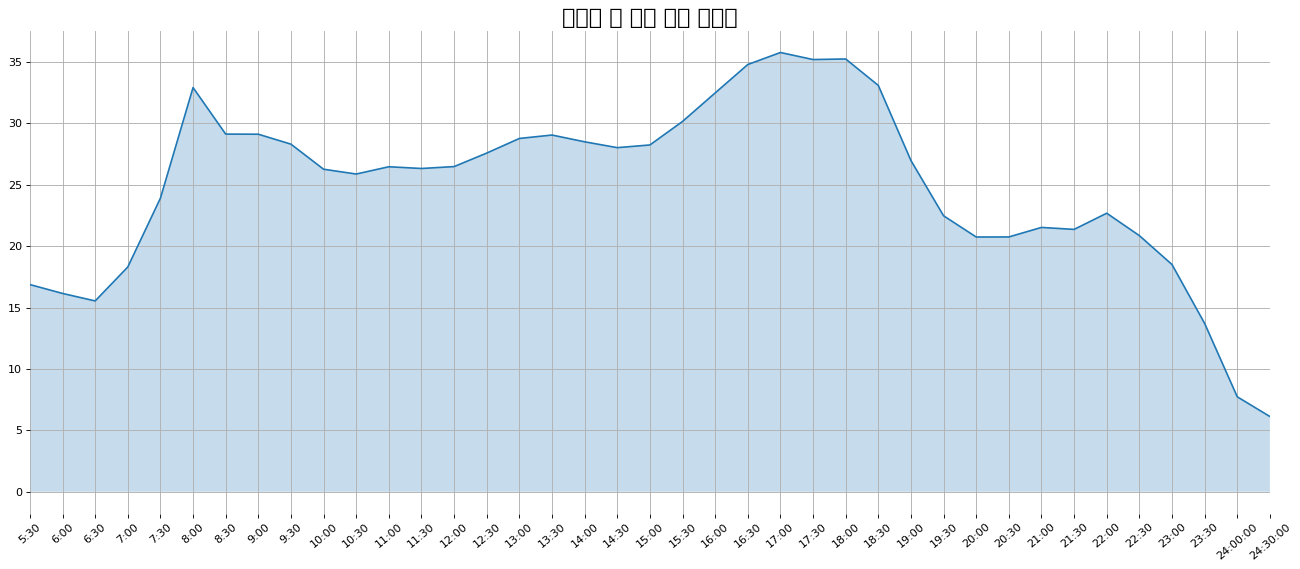

In [87]:
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(dftempdown)
plt.title('시간대 별 하선 평균 혼잡도', fontsize=20)
plt.grid(True)
plt.fill_between(dftempdown.index, dftempdown.values, alpha=0.25)
plt.xticks(rotation=40)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.margins(x=0)
plt.show()

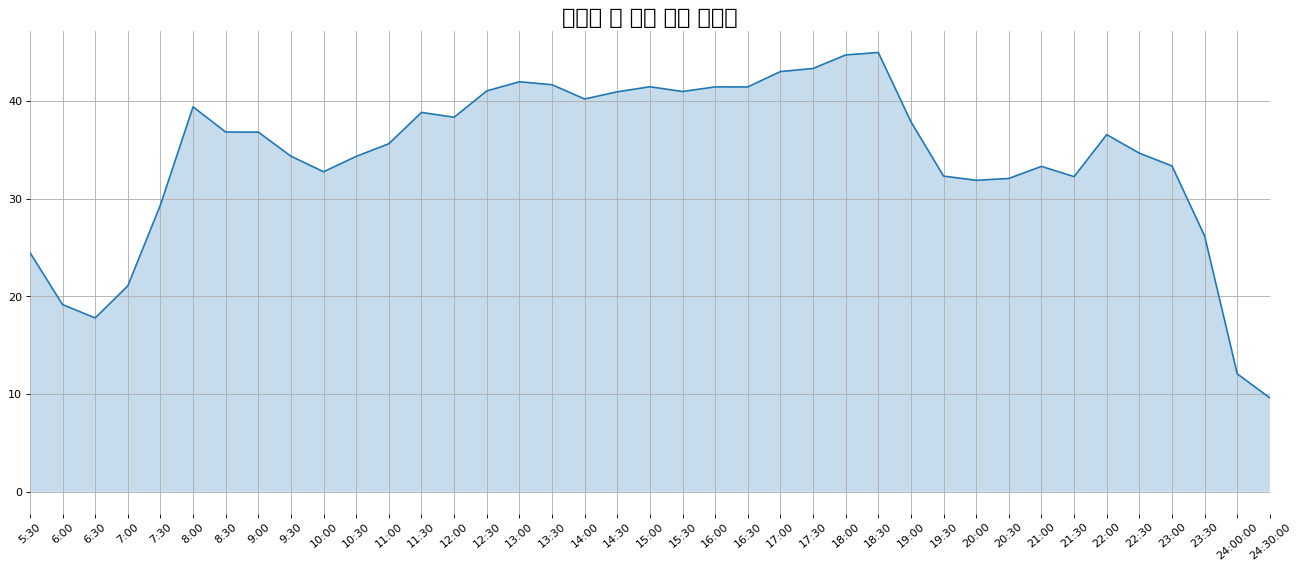

In [88]:
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(dftempout)
plt.title('시간대 별 외선 평균 혼잡도', fontsize=20)
plt.grid(True)
plt.fill_between(dftempout.index, dftempout.values, alpha=0.25)
plt.xticks(rotation=40)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.margins(x=0)
plt.show()

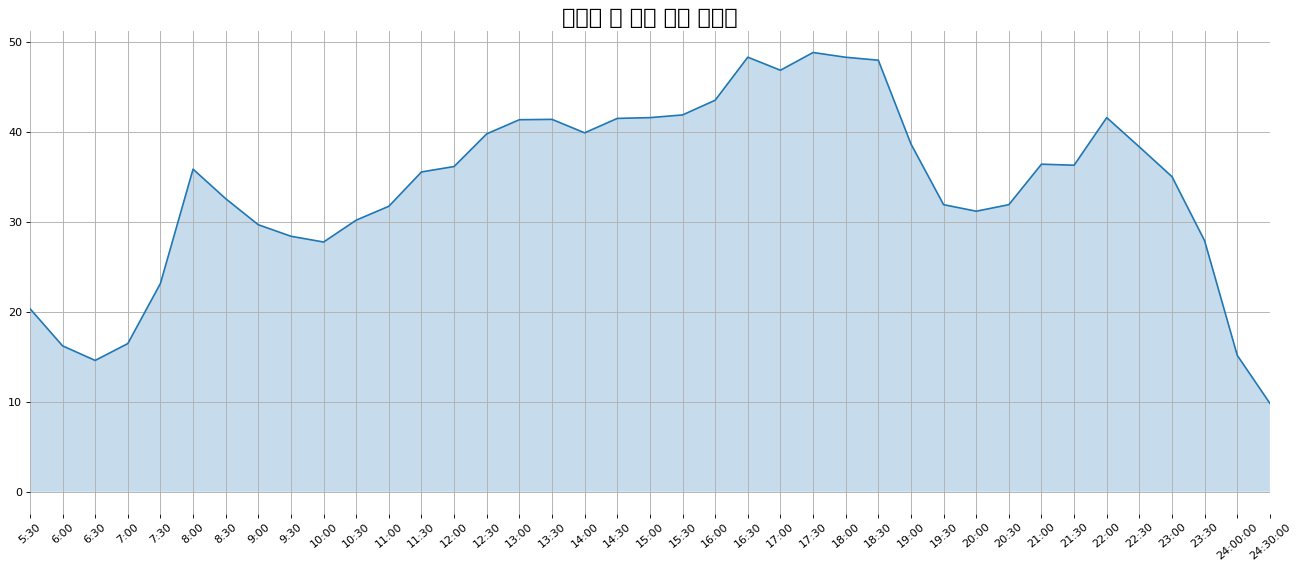

In [89]:
plt.figure(figsize=(20, 8), dpi=80)
plt.plot(dftempin)
plt.title('시간대 별 내선 평균 혼잡도', fontsize=20)
plt.grid(True)
plt.fill_between(dftempin.index, dftempin.values, alpha=0.25)
plt.xticks(rotation=40)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.margins(x=0)
plt.show()

In [90]:
data = pd.read_csv('../input/external-data/datalc.csv')
data2 = pd.read_csv('../input/external-data/in_april.csv')

In [91]:
data.head(3)

,Unnamed: 0,호선,역사명,미세먼지(PM10),이산화탄소(CO2),포름알데히드(HCHO),일산화탄소(CO),위도,경도
0,0,1,서울역1,76.4,627,16.4,0.6,37.554648,126.972559
1,1,1,시청1,100.7,610,17.8,1.0,37.564718,126.977108
2,2,1,종각,99.8,687,20.5,0.9,37.570161,126.982923


In [92]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [93]:
data['역사명'] = data['역사명'].str.replace(pat=r'[\d]', repl=r'', regex=True)
data.loc[data['역사명']=='서울역', '역사명'] = '서울'

In [94]:
def temp1(a):
    return a + '(1)'
def temp2(a):
    return a + '(2)'
def temp3(a):
    return a + '(3)'
def temp4(a):
    return a + '(4)'
def temp5(a):
    return a + '(5)'
def temp6(a):
    return a + '(6)'
def temp7(a):
    return a + '(7)'
def temp8(a):
    return a + '(8)'

In [95]:
data.loc[data['호선']==1, '역사명'] = data[data['호선']==1]['역사명'].apply(temp1)
data.loc[data['호선']==2, '역사명'] = data[data['호선']==2]['역사명'].apply(temp2)
data.loc[data['호선']==3, '역사명'] = data[data['호선']==3]['역사명'].apply(temp3)
data.loc[data['호선']==4, '역사명'] = data[data['호선']==4]['역사명'].apply(temp4)
data.loc[data['호선']==5, '역사명'] = data[data['호선']==5]['역사명'].apply(temp5)
data.loc[data['호선']==6, '역사명'] = data[data['호선']==6]['역사명'].apply(temp6)
data.loc[data['호선']==7, '역사명'] = data[data['호선']==7]['역사명'].apply(temp7)
data.loc[data['호선']==8, '역사명'] = data[data['호선']==8]['역사명'].apply(temp8)

In [96]:
data2.rename(columns={'지점명': '역사명'}, inplace=True)

In [97]:
def temp1(a):
    return a + '(1)'
def temp2(a):
    return a + '(2)'
def temp3(a):
    return a + '(3)'
def temp4(a):
    return a + '(4)'
def temp5(a):
    return a + '(5)'
def temp6(a):
    return a + '(6)'
def temp7(a):
    return a + '(7)'
def temp8(a):
    return a + '(8)'

In [98]:
data2.loc[data2['호선']=='1호선', '역사명'] = data2[data2['호선']=='1호선']['역사명'].apply(temp1)
data2.loc[data2['호선']=='2호선', '역사명'] = data2[data2['호선']=='2호선']['역사명'].apply(temp2)
data2.loc[data2['호선']=='3호선', '역사명'] = data2[data2['호선']=='3호선']['역사명'].apply(temp3)
data2.loc[data2['호선']=='4호선', '역사명'] = data2[data2['호선']=='4호선']['역사명'].apply(temp4)
data2.loc[data2['호선']=='5호선', '역사명'] = data2[data2['호선']=='5호선']['역사명'].apply(temp5)
data2.loc[data2['호선']=='6호선', '역사명'] = data2[data2['호선']=='6호선']['역사명'].apply(temp6)
data2.loc[data2['호선']=='7호선', '역사명'] = data2[data2['호선']=='7호선']['역사명'].apply(temp7)
data2.loc[data2['호선']=='8호선', '역사명'] = data2[data2['호선']=='8호선']['역사명'].apply(temp8)

In [99]:
data2.head(3)

,운영기관,역사명,호선,위치,측정일시,항목,측정값,측정기상태표시
0,서울교통공사,청량리(1),1호선,서울,2021042700,PM-2.5,29.1,정상
1,서울교통공사,청량리(1),1호선,서울,2021042701,PM-2.5,21.4,정상
2,서울교통공사,청량리(1),1호선,서울,2021042702,PM-2.5,18.2,정상


In [100]:
data03 = data2[data2['측정일시']==2021042703]
data19 = data2[data2['측정일시']==2021042719]

In [101]:
merged_data = pd.merge(data, data03[['역사명', '측정값']], how='outer', on='역사명')

In [102]:
merged_data.rename(columns={'측정값': '03시'}, inplace=True)

In [103]:
merged_data = pd.merge(merged_data, data19[['역사명', '측정값']], how='outer', on='역사명')

In [104]:
merged_data.rename(columns={'측정값': '19시'}, inplace=True)

In [105]:
merged_data.drop(merged_data[merged_data['위도'].isna()].index, axis=0, inplace=True)

In [106]:
merged_data.reset_index(drop=True).head(3)

,호선,역사명,미세먼지(PM10),이산화탄소(CO2),포름알데히드(HCHO),일산화탄소(CO),위도,경도,03시,19시
0,1.0,서울(1),76.4,627.0,16.4,0.6,37.554648,126.972559,19.7,53.9
1,1.0,시청(1),100.7,610.0,17.8,1.0,37.564718,126.977108,NaN,NaN
2,1.0,종각(1),99.8,687.0,20.5,0.9,37.570161,126.982923,49.6,124.3


In [107]:
merged_data.loc[merged_data['03시'].isna(), '03시'] = np.mean(merged_data['03시'])
merged_data.loc[merged_data['19시'].isna(), '19시'] = np.mean(merged_data['19시'])

In [108]:
merged_data.head(3)

,호선,역사명,미세먼지(PM10),이산화탄소(CO2),포름알데히드(HCHO),일산화탄소(CO),위도,경도,03시,19시
0,1.0,서울(1),76.4,627.0,16.4,0.6,37.554648,126.972559,19.700000,53.900000
1,1.0,시청(1),100.7,610.0,17.8,1.0,37.564718,126.977108,22.451915,37.791102
2,1.0,종각(1),99.8,687.0,20.5,0.9,37.570161,126.982923,49.600000,124.300000


- merged_data.to_csv를 통해 data2_final.csv 로 추출

In [109]:
lc = pd.read_csv('/kaggle/input/external-data/location.csv') # 서울시 경계 좌표
df2 = pd.read_csv('/kaggle/input/external-data/data2_final.csv') # 위에서 추출한 데이터

각 호선별 위치 및 위치당 미세먼지량 시각화

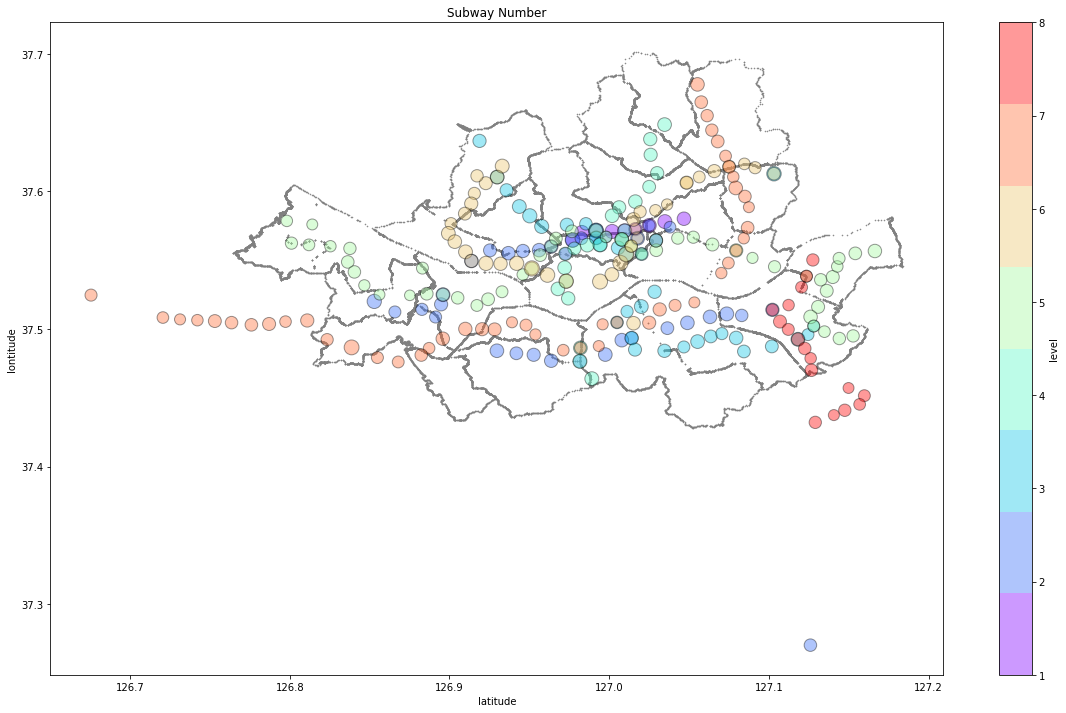

In [110]:
lc.columns = ['경도','위도']
plt.figure(figsize=(20,12))
plt.scatter(lc['경도'],lc['위도'], s =0.3 , color = 'gray')

plt.scatter(df2['경도'],df2['위도'],alpha=0.4,s=df2['미세먼지(PM10)']*2,c=df2['호선'],
            cmap=plt.cm.get_cmap('rainbow',8),edgecolors='black')
plt.xlabel('latitude')
plt.ylabel('lontitude')
cb=plt.colorbar(label='level')
plt.title("Subway Number")
plt.show()

위치별 미세먼지(PM10)량

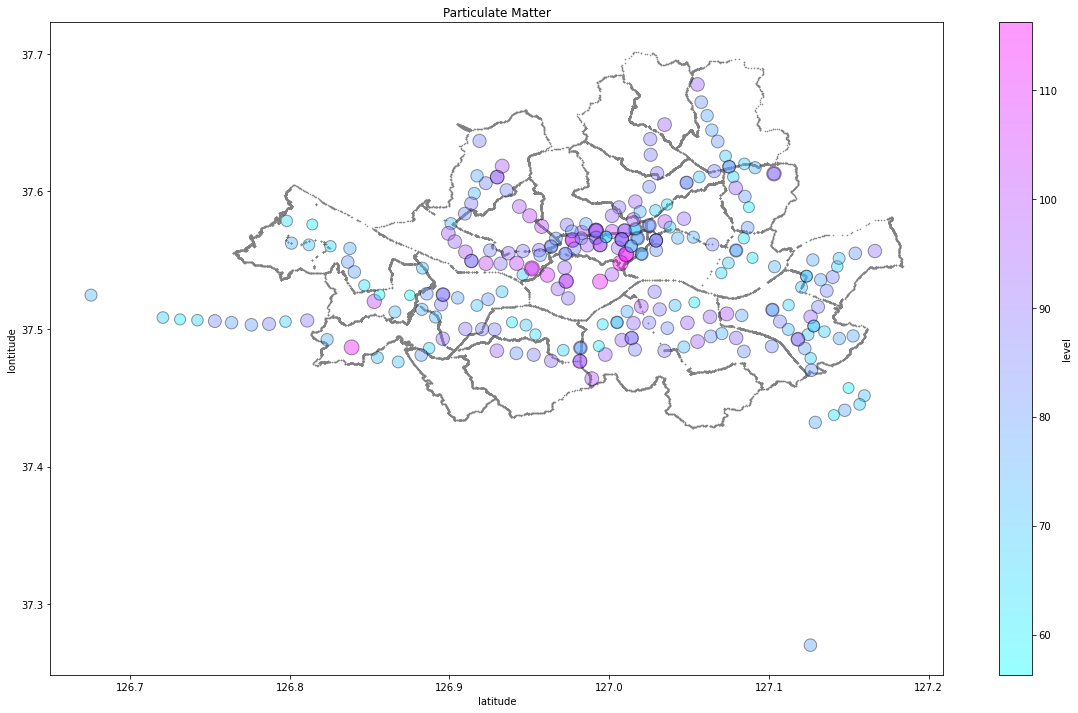

In [111]:
plt.figure(figsize=(20,12))
plt.scatter(lc['경도'],lc['위도'], s =0.3 , color = 'gray')

plt.scatter(df2['경도'],df2['위도'],alpha=0.4,s=df2['미세먼지(PM10)']*2,c=df2['미세먼지(PM10)'],
            cmap=plt.cm.get_cmap('cool'),edgecolors='black')
plt.xlabel('latitude')
plt.ylabel('lontitude')
plt.title("Particulate Matter")
cb=plt.colorbar(label='level')
plt.show()

위치별 이산화 탄소량

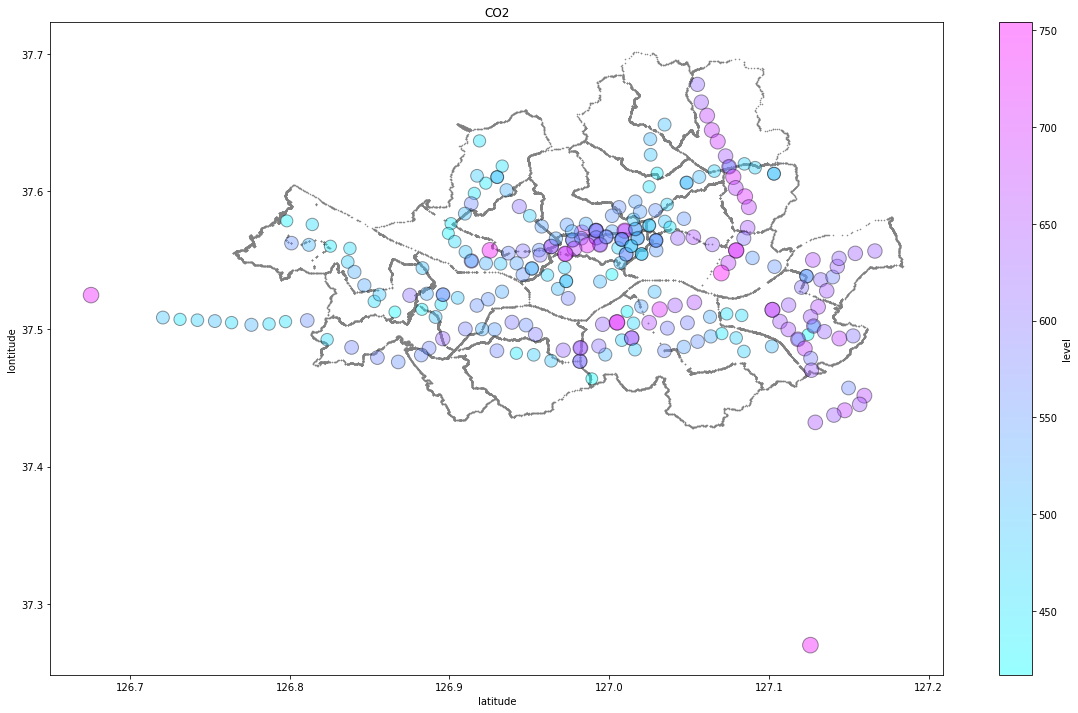

In [112]:
plt.figure(figsize=(20,12))
plt.scatter(lc['경도'],lc['위도'], s =0.3 , color = 'gray')

plt.scatter(df2['경도'],df2['위도'],alpha=0.4,s=df2['이산화탄소(CO2)']/3,c=df2['이산화탄소(CO2)'],
            cmap=plt.cm.get_cmap('cool'),edgecolors='black')
plt.xlabel('latitude')
plt.ylabel('lontitude')
plt.title("CO2")
cb=plt.colorbar(label='level')
plt.show()


위치별 포름알데히드(HCOH)량

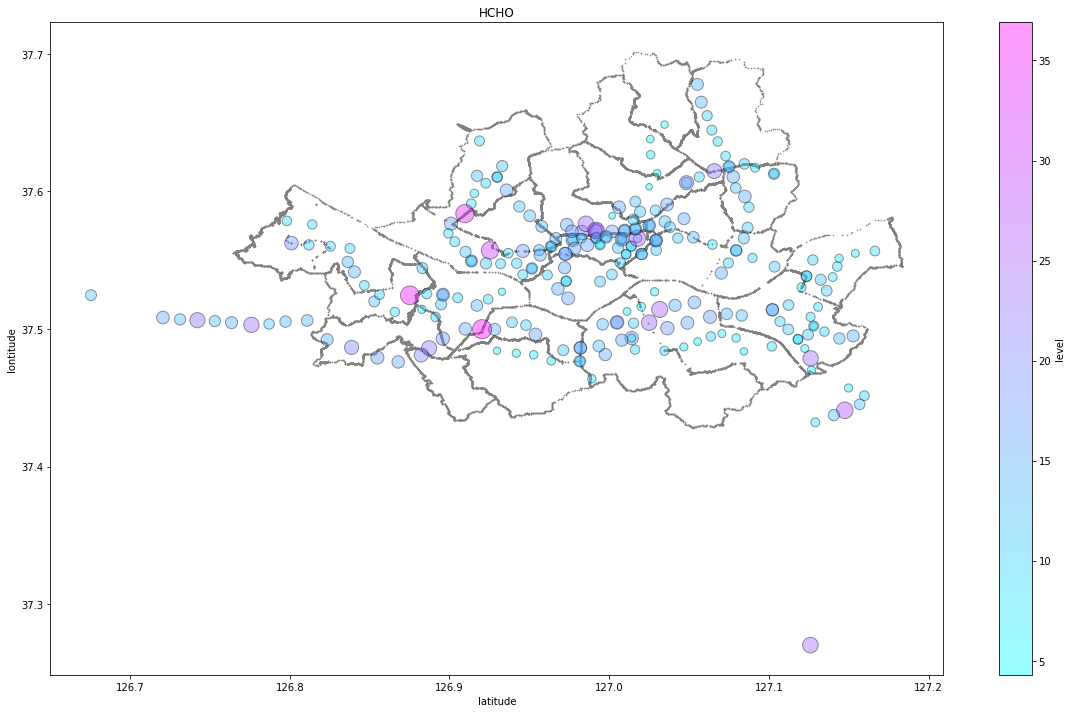

In [113]:
plt.figure(figsize=(20,12))
plt.scatter(lc['경도'],lc['위도'], s =0.3 , color = 'gray')

plt.scatter(df2['경도'],df2['위도'],alpha=0.4,s=df2['포름알데히드(HCHO)']*10,c=df2['포름알데히드(HCHO)'],
            cmap=plt.cm.get_cmap('cool'),edgecolors='black')
plt.xlabel('latitude')
plt.ylabel('lontitude')
plt.title("HCHO")
cb=plt.colorbar(label='level')
plt.show()


위치별 일산화탄소(CO)량

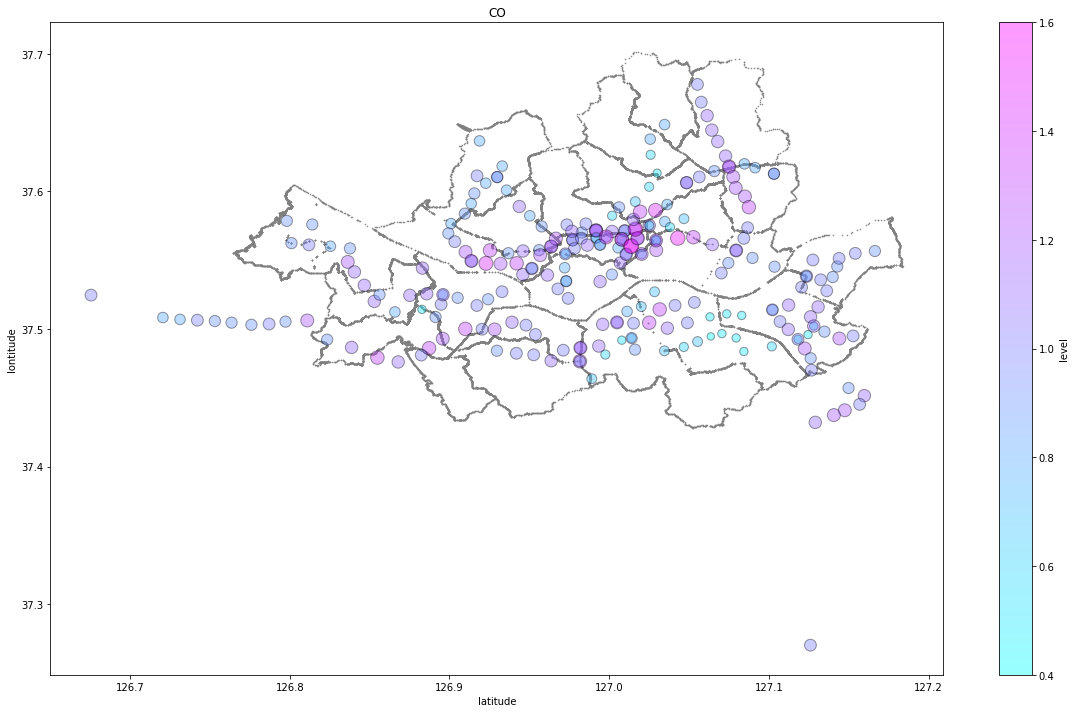

In [114]:
plt.figure(figsize=(20,12))
plt.scatter(lc['경도'],lc['위도'], s =0.3 , color = 'gray')

plt.scatter(df2['경도'],df2['위도'],alpha=0.4,s=df2['일산화탄소(CO)']*140,c=df2['일산화탄소(CO)'],
            cmap=plt.cm.get_cmap('cool'),edgecolors='black')
plt.xlabel('latitude')
plt.ylabel('lontitude')
plt.title("CO")
cb=plt.colorbar(label='level')
plt.show()

## 시간별 지하철 실내 공기오염도

### 새벽3시 지하철 실내 공기 오염도(지하철 운행안함)

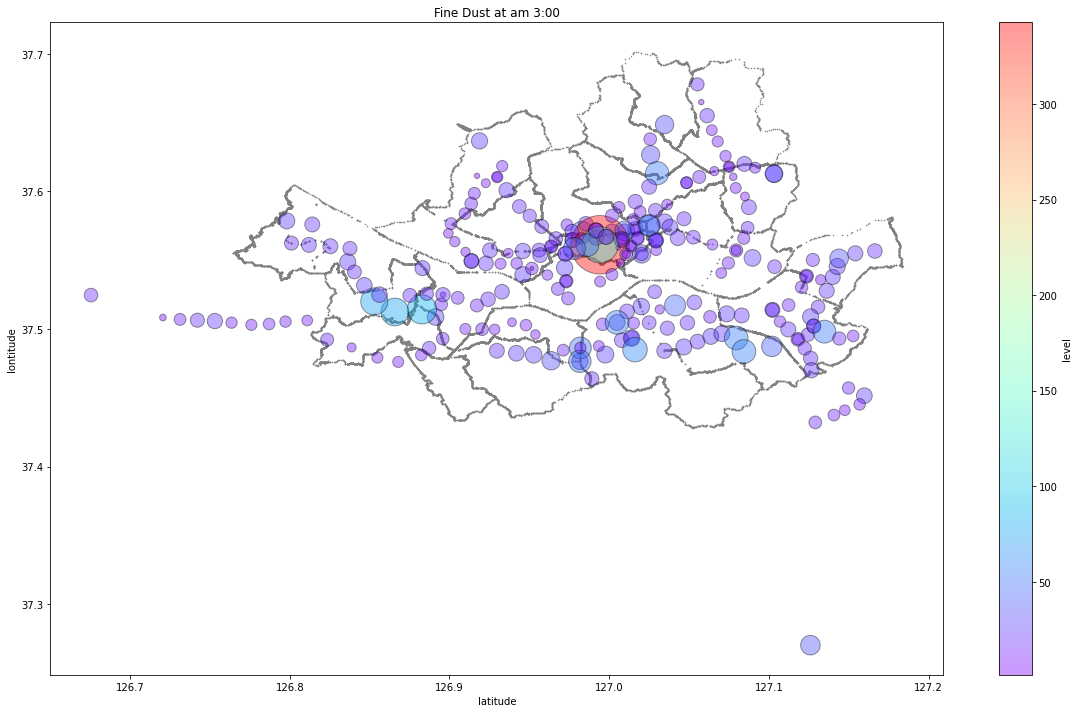

In [115]:
plt.figure(figsize=(20,12))
plt.scatter(lc['경도'],lc['위도'], s =0.3 , color = 'gray')

plt.scatter(df2['경도'],df2['위도'],alpha=0.4,s=df2['03시']*10,c=df2['03시'],
            cmap=plt.cm.get_cmap('rainbow'),edgecolors='black')
plt.xlabel('latitude')
plt.ylabel('lontitude')
cb=plt.colorbar(label='level')
plt.title("Fine Dust at am 3:00")
plt.show()

### 저녁7시 지하철 실내 공기오염도(지하철 운행)

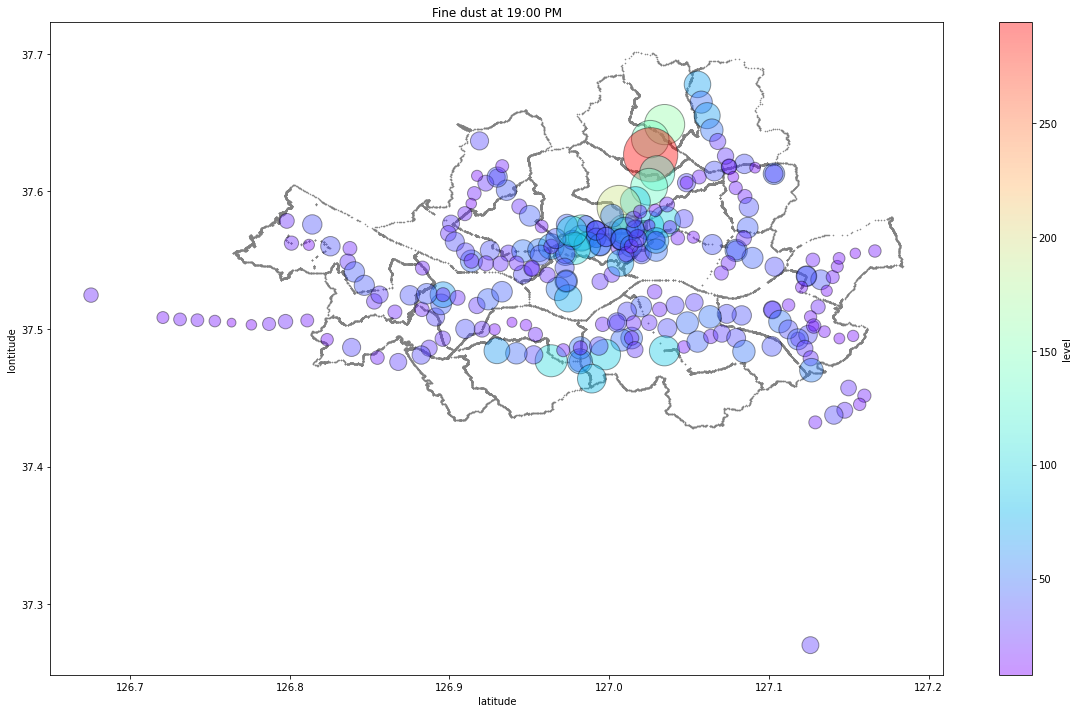

In [116]:
plt.figure(figsize=(20,12))
plt.scatter(lc['경도'],lc['위도'], s =0.3 , color = 'gray')

plt.scatter(df2['경도'],df2['위도'],alpha=0.4,s=df2['19시']*10,c=df2['19시'],
            cmap=plt.cm.get_cmap('rainbow'),edgecolors='black')
plt.xlabel('latitude')
plt.ylabel('lontitude')
plt.title("Fine dust at 19:00 PM")
cb=plt.colorbar(label='level')
plt.show()

# `-` Summary

1. 몇가지 변수만 알고있다면 만든 모델로 일평균 혼잡도를 예측할 수 있다.
2. 혼잡도와 미세먼지 사이의 관계를 분석해보았더니 유의하지 않았다.
    미세먼지와의 연관이 있는 몇가지 변수를 고려해보았고, 열차운행횟수와 관련이 있었다.